In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("C:\\Users\\Admin\\Documents\\GitHub\\GamesGraph\\scripts\\wip_data\\old\\profiles23_scraped_csv.csv",
                 index_col=0)
df.head()

In [ ]:
df.drop("profile", axis=1, inplace=True)
df.drop("time", axis=1, inplace=True)

In [ ]:
for index, col in df.iteritems():
    if col.count() < 10:
        print(index, col.count())
        df.drop(index, axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
df.fillna(0, inplace=True)
df.head()

In [ ]:
df = df.transpose()
df.head()

In [ ]:
matrix = df.as_matrix()

In [ ]:
matrix

In [ ]:
import matplotlib
import seaborn as sns
%matplotlib inline
from sklearn.manifold import TSNE
X = matrix
model = TSNE(n_components=2, init='pca', verbose=2)
# np.set_printoptions(suppress=True)
Y = model.fit_transform(X)


In [ ]:
df2 = pd.DataFrame(Y, index=[index for index, _ in df.transpose().iteritems()])
df2.head()

In [ ]:
df2.to_csv("C:\\Users\\Admin\\Documents\\GitHub\\GamesGraph\\scripts\\wip_data\\_test_tsne_2dim.csv")

In [ ]:
df2.rename(index=str, columns={0: 'x', 1: 'y'})

In [ ]:
import pandas as pd
df = pd.read_csv("C:\\Users\\Admin\\Documents\\GitHub\\GamesGraph\\scripts\\wip_data\\_test_tsne.csv", index_col=0)
df.rename(index = str, columns = {'0': 'x', '1': 'y', '2': 'z'}, inplace=True)
df.head()

In [ ]:
import networkx as nx
G = nx.Graph()
for index, row in df.iterrows():
    G.add_node(index)
    G.node[index]['appid'] = index
    G.node[index]['x'] = row['x'].item()
    G.node[index]['y'] = row['y'].item()
    G.node[index]['z'] = row['z'].item()

In [ ]:
nx.write_graphml(G, "test.graphml")

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import IncrementalPCA, FastICA
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import euclidean
import numpy as np
import pandas as pd

In [2]:
% time data = pd.read_csv("C:\\Users\\Admin\\Documents\\Github\\GamesGraph\\scripts\\wip_data\\_test_tsne_2dim.csv", index_col=0).as_matrix()
print(data.shape)

Wall time: 8.52 ms
(6087, 2)


In [3]:
% time datahd = pd.read_csv("C:\\Users\\Admin\\Documents\\GitHub\\GamesGraph\\scripts\\wip_data\\old\\profiles23_scraped_csv.csv", index_col=0)
# datahd.head()
datahd.drop("profile", axis=1, inplace=True)
datahd.drop("time", axis=1, inplace=True)
for index, col in datahd.iteritems():
    if col.count() < 10:
        print(index, col.count())
        datahd.drop(index, axis=1, inplace=True)
datahd.fillna(0, inplace=True)
datahd = datahd.transpose()
datahd = datahd.as_matrix()
print(datahd.shape)

Wall time: 13 s
appid10000 3
appid1002 8
appid100400 1
appid100410 5
appid10080 2
appid100970 2
appid100980 1
appid10120 2
appid10140 6
appid10230 3
appid10240 3
appid10250 2
appid10260 2
appid102820 9
appid10400 1
appid104100 5
appid10650 6
appid10660 4
appid10690 2
appid10700 8
appid109200 8
appid109700 3
appid11060 1
appid111000 3
appid111010 1
appid11120 1
appid111300 1
appid11520 2
appid11550 6
appid11900 4
appid11920 3
appid12190 9
appid12390 8
appid12420 9
appid12430 1
appid12510 4
appid12530 8
appid12540 5
appid12560 6
appid12570 6
appid12580 2
appid12590 7
appid12600 7
appid12630 1
appid12650 2
appid12670 6
appid12860 3
appid13000 9
appid1320 1
appid13700 2
appid15060 1
appid15080 7
appid15150 3
appid15160 1
appid15220 1
appid15230 3
appid15270 7
appid15310 3
appid15330 1
appid15910 4
appid15920 5
appid15930 9
appid15940 1
appid15970 4
appid15980 1
appid15990 1
appid1600 9
appid16000 7
appid16020 6
appid16030 3
appid16040 4
appid16100 2
appid16110 3
appid16120 1
appid16130 1
a

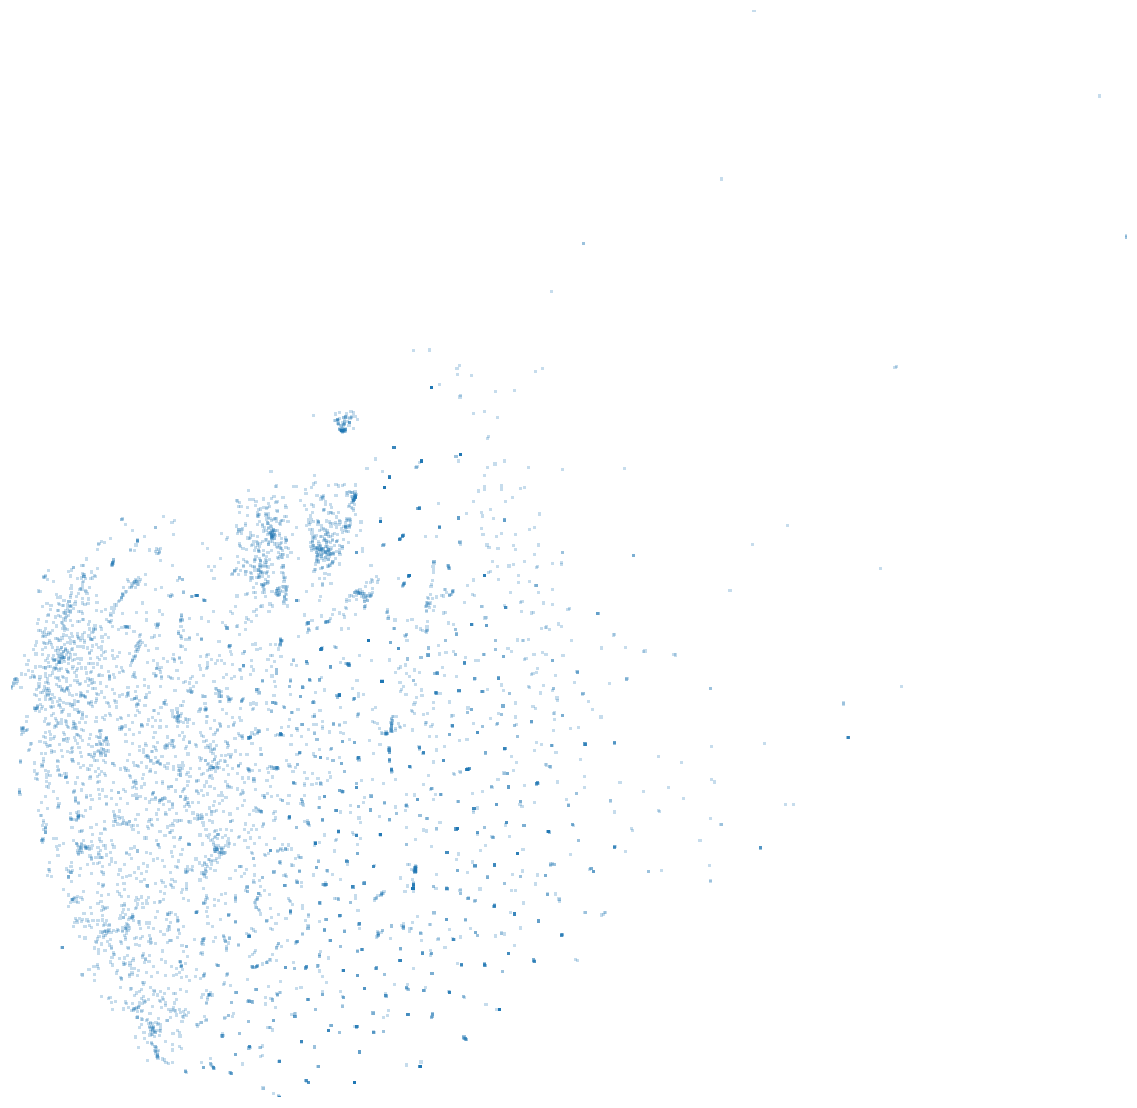

In [4]:
def plot_tsne(xy, colors=None, alpha=0.25, figsize=(20,20), s=10, cmap='hsv'):
    plt.figure(figsize=figsize, facecolor='white')
    plt.margins(0)
    plt.axis('off')
    fig = plt.scatter(xy[:,0], xy[:,1],
                     c = colors,
                     cmap = cmap,
                     alpha = alpha,
                     marker = ',',
                     s = s,
                     lw = 0,
                     edgecolor = '')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.show()

plot_tsne(data)

In [5]:
from sklearn.manifold import TSNE
data3model = TSNE(n_components=3, init='pca', verbose=2)
data3 = data3model.fit_transform(datahd)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 6087
[t-SNE] Computed conditional probabilities for sample 2000 / 6087
[t-SNE] Computed conditional probabilities for sample 3000 / 6087
[t-SNE] Computed conditional probabilities for sample 4000 / 6087
[t-SNE] Computed conditional probabilities for sample 5000 / 6087
[t-SNE] Computed conditional probabilities for sample 6000 / 6087
[t-SNE] Computed conditional probabilities for sample 6087 / 6087
[t-SNE] Mean sigma: 1.467495
[t-SNE] Iteration 25: error = 1.1015928, gradient norm = 0.0052313
[t-SNE] Iteration 50: error = 1.0797940, gradient norm = 0.0046124
[t-SNE] Iteration 75: error = 0.9708861, gradient norm = 0.0025111
[t-SNE] Iteration 100: error = 0.9422455, gradient norm = 0.0023341
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.942245
[t-SNE] Iteration 125: error = 0.8863315, gradient norm = 0.0020527
[t-SNE] Itera

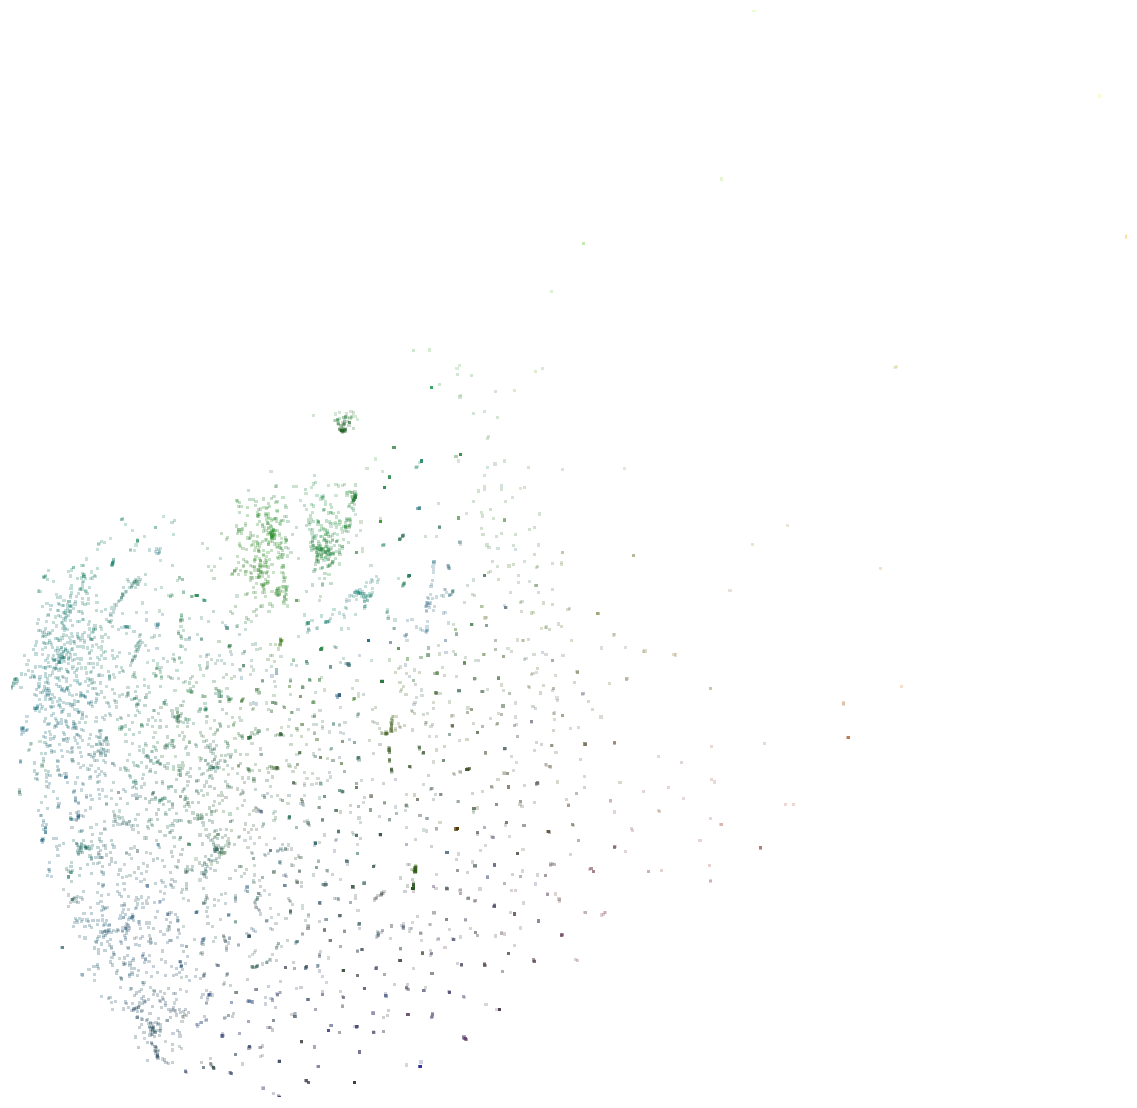

In [7]:
data3 -= np.min(data3, axis=0)
data3 /= np.max(data3, axis=0)
plot_tsne(data, data3)

Wall time: 58.8 s


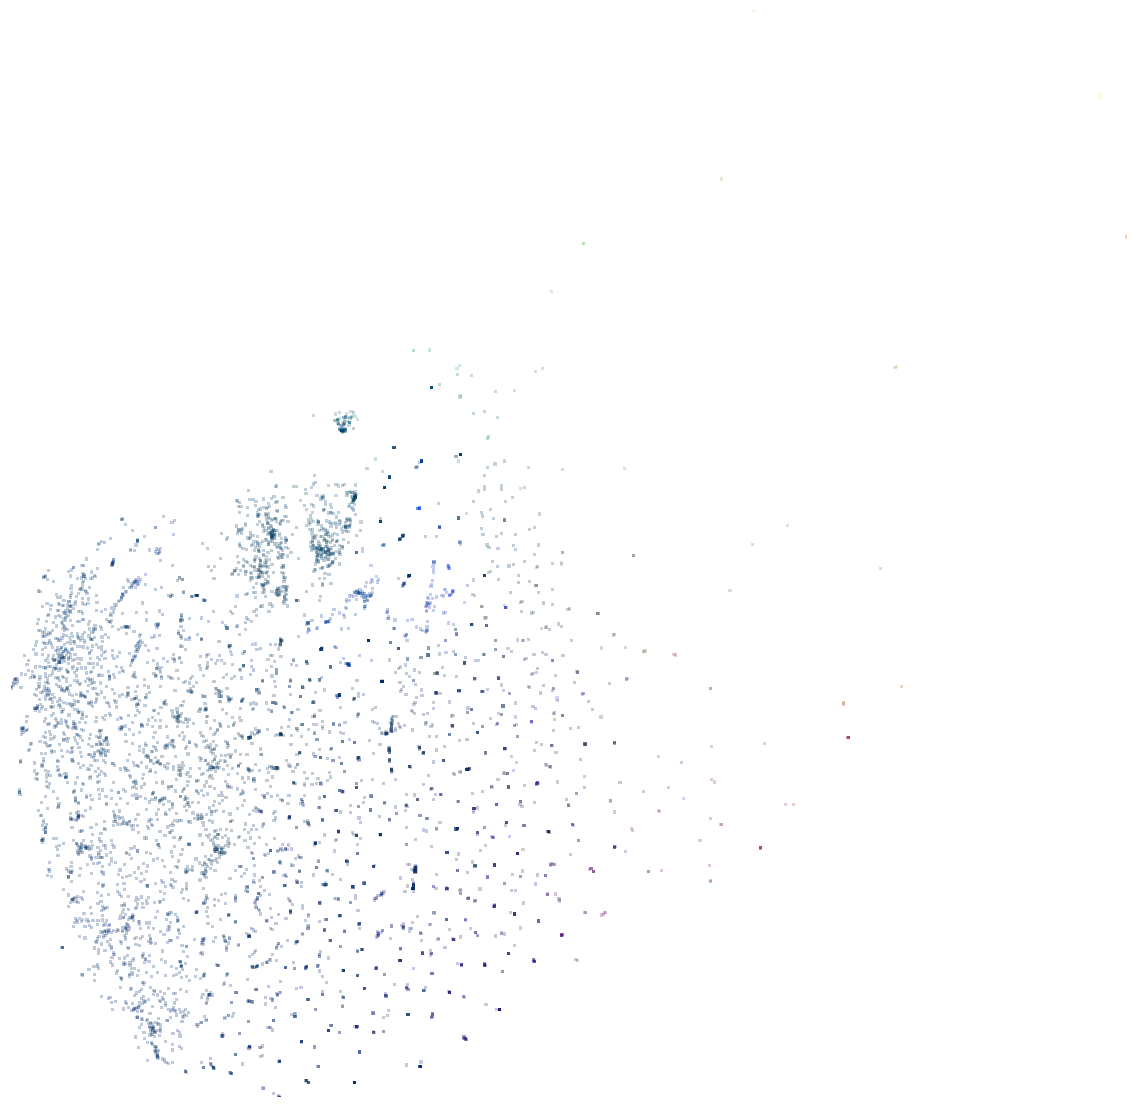

In [8]:
pca = IncrementalPCA(n_components = 3)
%time pca_projection = pca.fit_transform(datahd)
pca_projection -= np.min(pca_projection,axis=0)
pca_projection /= np.max(pca_projection,axis=0)
plot_tsne(data, pca_projection)

[[128  64  32 ...,   0   2   1]
 [128  64  32 ...,   0   2   1]
 [128  64   0 ...,   4   0   0]
 ..., 
 [128  64  32 ...,   0   2   0]
 [128  64  32 ...,   0   0   1]
 [  0  64   0 ...,   0   2   1]] (6087, 8) [235 235 196 ..., 250 249  91]
Wall time: 1min 5s


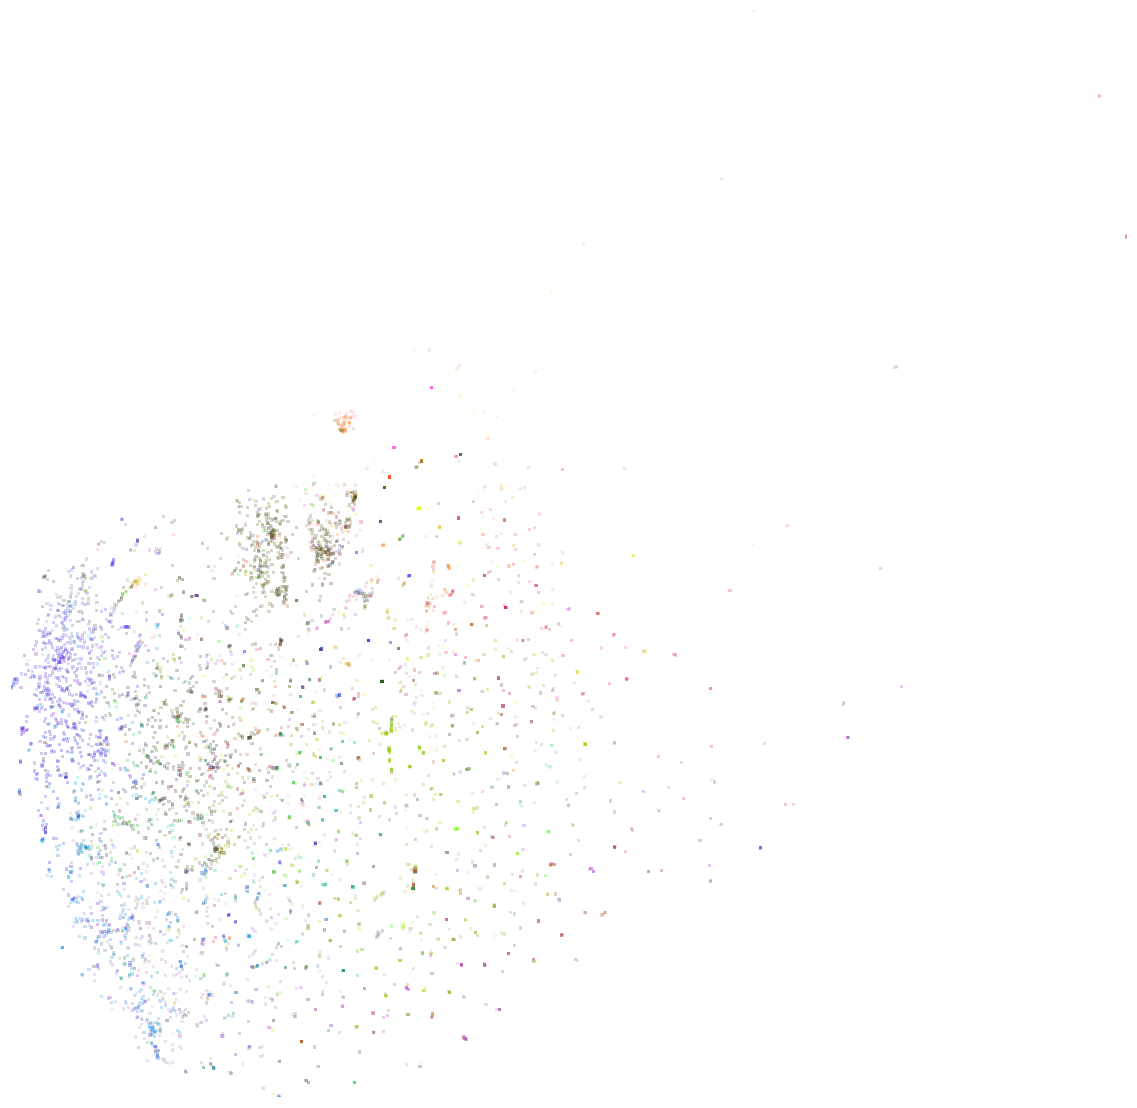

In [29]:
def projection_to_colors(projection, bits_per_channel=8):
    basis = 2**np.arange(bits_per_channel)[::-1] # [128  64  32  16   8   4   2   1]
    basis = np.hstack([basis, basis, basis]) # [128  64  32  16   8   4   2   1 128  64  32  16   8   4   2   1 128  64 32  16   8   4   2   1] 
    shuffled = np.hstack([projection[:,0::3], projection[:,1::3], projection[:,2::3]]) # shuffles rows and concats back into 24-col array
    bits = (shuffled > np.median(shuffled, axis=0)) * basis # 0 or 1 when value is larger than mean value of said column, multiplied by 128, 64..
    # print(bits)
    # temp = bits[:,:(bits_per_channel)] 
    # print(temp, temp.shape, temp.sum(axis=1))
    colors = np.vstack([bits[:,:(bits_per_channel)].sum(axis=1),
                       bits[:,(bits_per_channel):(2*bits_per_channel)].sum(axis=1),
                       bits[:,(2*bits_per_channel):(3*bits_per_channel)].sum(axis=1)]).astype(float).T
    return colors / (2**bits_per_channel - 1)

def pack_binary_pca(data, bits_per_channel=8):
    bits_per_color = 3 * bits_per_channel
    pca = IncrementalPCA(n_components=bits_per_color)
    pca_projection = pca.fit_transform(data)
    # print('pca_projection', pca_projection,pca_projection.shape)
    return projection_to_colors(pca_projection, bits_per_channel)

%time colors = pack_binary_pca(datahd, 8)
plot_tsne(data, colors)

In [15]:
colors

array([[ 0.74117647,  0.95294118,  0.62745098],
       [ 0.70980392,  0.95294118,  0.62745098],
       [ 0.61960784,  0.50588235,  0.36470588],
       ..., 
       [ 0.88235294,  0.87058824,  0.74901961],
       [ 0.77254902,  0.91764706,  0.74117647],
       [ 0.4627451 ,  0.89019608,  0.07058824]])